In [ ]:
!wget -c http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2023-10-09 11:02:14--  http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.71.198, 52.216.32.80, 52.217.98.118, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.71.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  55.2MB/s    in 11s     

2023-10-09 11:02:26 (50.2 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [ ]:
import numpy as np
import random
import os
import matplotlib

In [ ]:
from tensorflow.keras import layers
image_in = layers.Input(shape=(150,150,3))

In [ ]:
x = layers.Conv2D(16, 3, activation='relu')(image_in)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)

In [ ]:
output = layers.Dense(1,activation='sigmoid')(x)

In [ ]:
from tensorflow.keras.models import Model
my_model= Model(image_in,output)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
my_model.compile(loss='binary_crossentropy',optimizer=RMSprop(0.001),metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data = ImageDataGenerator(rescale=1./255)

In [ ]:
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator

url = "http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip"

# Téléchargez le fichier zip
response = requests.get(url)

# Enregistrez le fichier zip localement
with open('Cat_Dog_data.zip', 'wb') as file:
    file.write(response.content)

# Extrait le fichier zip
with zipfile.ZipFile('Cat_Dog_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

train_dir = 'data/Cat_Dog_data/train'

training_dataset = training_data.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 22500 images belonging to 2 classes.


In [ ]:

testing_dir = 'data/Cat_Dog_data/test'

validation_dataset = training_data.flow_from_directory(testing_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2500 images belonging to 2 classes.


In [ ]:
H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=30,validation_data=validation_dataset, validation_steps=50, verbose=2)

<ipython-input-15-dc5fdd7b0e58>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=30,validation_data=validation_dataset, validation_steps=50, verbose=2)


Epoch 1/30
100/100 - 41s - loss: 0.7544 - acc: 0.5260 - val_loss: 0.6855 - val_acc: 0.5380 - 41s/epoch - 407ms/step
Epoch 2/30
100/100 - 36s - loss: 0.6619 - acc: 0.6090 - val_loss: 0.7131 - val_acc: 0.5230 - 36s/epoch - 364ms/step
Epoch 3/30
100/100 - 37s - loss: 0.6186 - acc: 0.6510 - val_loss: 0.5700 - val_acc: 0.7040 - 37s/epoch - 373ms/step
Epoch 4/30
100/100 - 36s - loss: 0.5798 - acc: 0.6985 - val_loss: 0.6051 - val_acc: 0.6730 - 36s/epoch - 361ms/step
Epoch 5/30
100/100 - 37s - loss: 0.5689 - acc: 0.6945 - val_loss: 0.5888 - val_acc: 0.6840 - 37s/epoch - 369ms/step
Epoch 6/30
100/100 - 36s - loss: 0.5422 - acc: 0.7255 - val_loss: 0.5654 - val_acc: 0.7100 - 36s/epoch - 360ms/step
Epoch 7/30
100/100 - 36s - loss: 0.5477 - acc: 0.7080 - val_loss: 0.5215 - val_acc: 0.7170 - 36s/epoch - 356ms/step
Epoch 8/30
100/100 - 36s - loss: 0.5274 - acc: 0.7380 - val_loss: 0.5072 - val_acc: 0.7560 - 36s/epoch - 357ms/step
Epoch 9/30
100/100 - 35s - loss: 0.5175 - acc: 0.7365 - val_loss: 0.5109

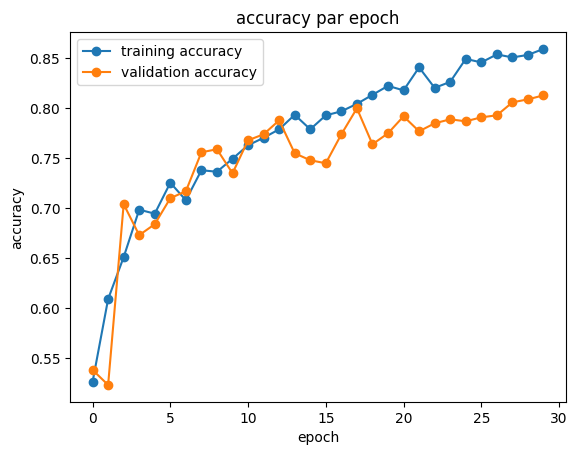

In [ ]:
import matplotlib.pyplot as plt


plt.plot(H.history['acc'], label='training accuracy', marker='o')
plt.plot(H.history['val_acc'], label='validation accuracy', marker='o')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy par epoch')
plt.legend()

plt.show()


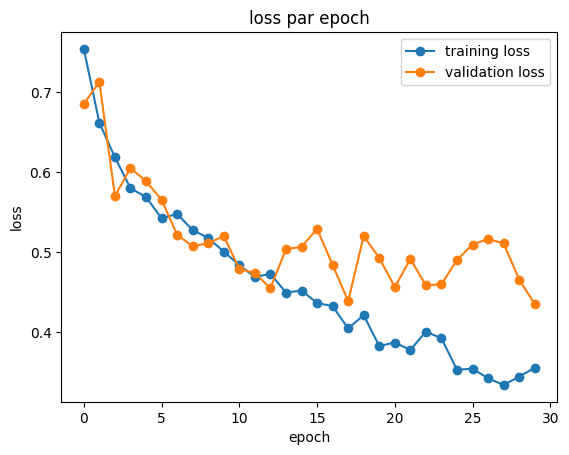

In [ ]:
plt.plot(H.history['loss'], label='training loss', marker='o')
plt.plot(H.history['val_loss'], label='validation loss', marker='o')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss par epoch')
plt.legend()

plt.show()


In [ ]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.5).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 11s 89ms/step
Nombre de chats : [1145]Nombre de chiens : [1355]


In [ ]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.8).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 11s 88ms/step
Nombre de chats : [1604]Nombre de chiens : [896]


1125/1125 [==============================] - 100s 89ms/step


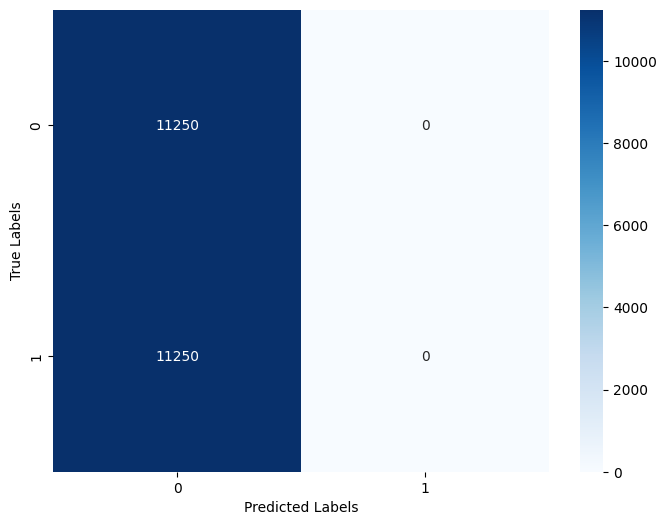

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


predictions = my_model.predict(training_dataset)
y_pred = np.argmax(predictions, axis=1)
true_labels = training_dataset.classes


cm = confusion_matrix(true_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

125/125 [==============================] - 11s 89ms/step


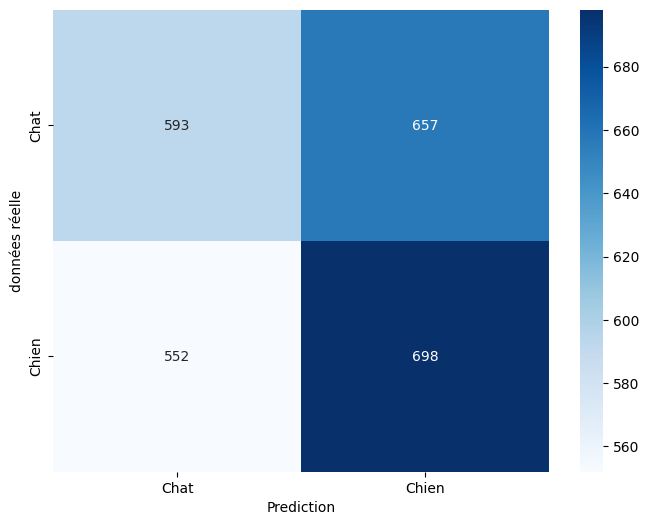

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


predictions = my_model.predict(validation_dataset)

binary_predictions = (predictions > 0.5).astype(int)


true_labels = validation_dataset.classes


cm = confusion_matrix(true_labels, binary_predictions)

class_names = ['Chat', 'Chien']


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('données réelle')
plt.show()
